#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.

### You would need to submit your GitHub repository link. Refer to the PDF document for the instructions and details.





In [7]:
## import cv2
## import numpy
## import matplotlib pyplot
## import KMeans cluster from sklearn
## import distance from scipy.spatial

import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from scipy.spatial import distance
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [9]:
## Reading the image plaksha_Faculty.jpg
img = cv2.imread("plaksha_faculty.jpg")
  
## Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
  
# Applying the face detection method on the grayscale image. 
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))
 
# Define the text and font parameters
text = "Plaksha Faculty's Face Detected" ## The text you want to write
font = cv2.FONT_HERSHEY_SIMPLEX  ## Font type
font_scale = 1  ## Font scale factor
font_color = (0,0,255)  ## Text color in BGR format (here, it's red)
font_thickness = 2  ## Thickness of the text

  
# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    cv2.putText(img, text, (50,250), font, font_scale, font_color, font_thickness)
    
## Display the image and window title should be "Total number of face detected are #"  
cv2.imshow("Image",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

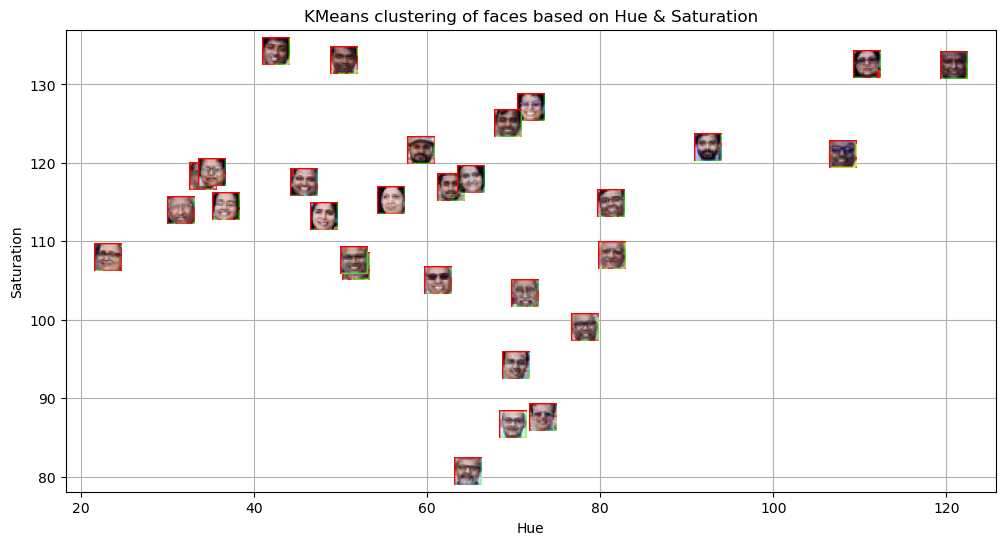

In [10]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV) ## call the img and convert it from BGR to HSV and store in img_hsv
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)

## Perform k-Means clustering on hue_saturation and store in kmeans
class KMeansCustom:
    def __init__(self, n_clusters=3, max_iters=100):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        
    def fit(self, X):
        np.random.seed(42)
        self.cluster_centers_ = X[np.random.choice(len(X), self.n_clusters, replace=False)]
        
        for _ in range(self.max_iters):
            distances = np.linalg.norm(X[:, None] - self.cluster_centers_, axis=2)
            self.labels_ = np.argmin(distances, axis=1)
            
            new_centroids = np.array([
                X[self.labels_ == i].mean(axis=0)
                for i in range(self.n_clusters)
            ])
            
            if np.allclose(self.cluster_centers_, new_centroids):
                break
                
            self.cluster_centers_ = new_centroids
        
        return self

kmeans = KMeansCustom(n_clusters=3)
kmeans.fit(hue_saturation)

centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])
    

## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("KMeans clustering of faces based on Hue & Saturation")
## Put grid
plt.grid()
## show the plot
plt.show()

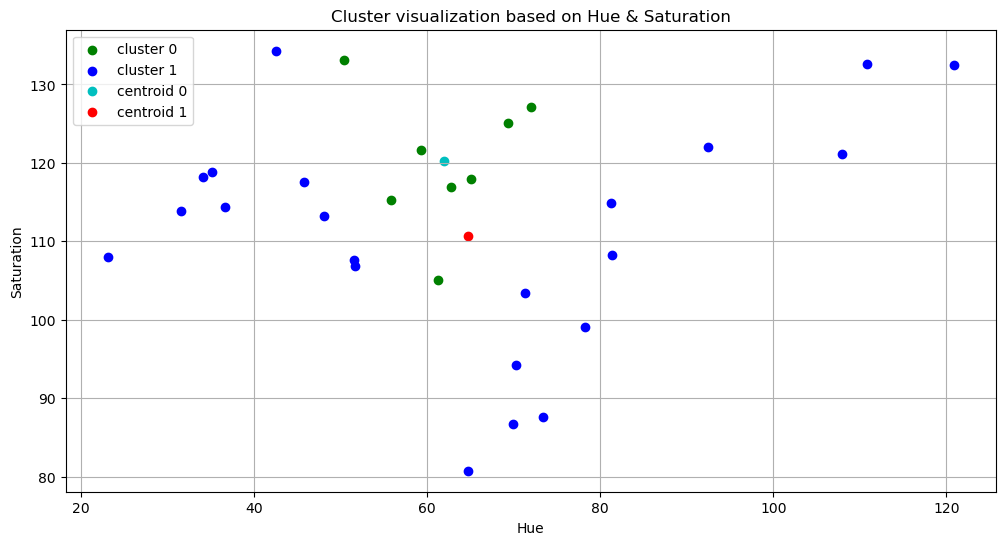

In [11]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:,0], cluster_0_points[:,1], color='g', label='cluster 0')


cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:,0], cluster_1_points[:,1], color='b', label='cluster 1')

# Calculate and plot centroids
centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0], centroid_0[1],color='c', label='centroid 0')
plt.scatter(centroid_1[0], centroid_1[1],color='r',label='centroid 1')

## Put x label
plt.xlabel('Hue')
## Put y label
plt.ylabel('Saturation')
## Put title
plt.title('Cluster visualization based on Hue & Saturation')
## Add a legend
plt.legend()
## Add grid
plt.grid()
## Show the plot
plt.show()


In [31]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread('Dr_Shashi_Tharoor.jpg')
# Detect face  in the template image after converting it to gray and store it in template_faces
template_gray = cv2.cvtColor(template_img, cv2.COLOR_BGR2GRAY)
template_faces = face_cascade.detectMultiScale(template_gray, scaleFactor=1.1, minNeighbors=4, minSize=(30,30))
# Draw rectangles around the detected faces
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x + w, y + h), (0, 255, 0), 3)
cv2.imshow('Detected face in template image', template_img)
cv2.waitKey(0)
cv2.destroyAllWindows()      

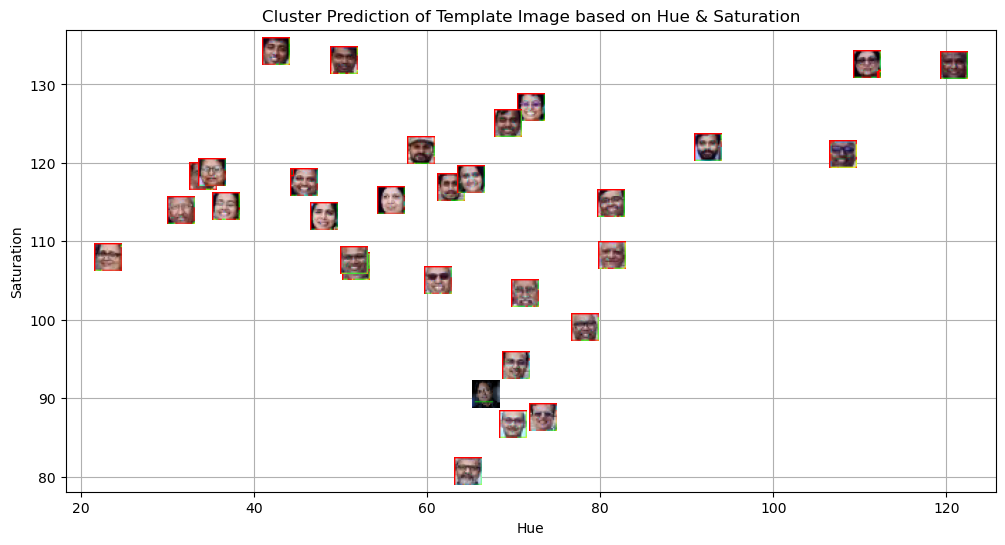

In [47]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img, cv2.COLOR_BGR2HSV)

# Extract hue and saturation features from the template image as we did it for detected faces.
template_hue = np.mean(template_hsv[:,:,0])
template_saturation = np.mean(template_hsv[:,:,1])

# Predict the cluster label for the template image and store it in template_label
template_label = np.array([template_hue, template_saturation])[0]

# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)
for i, (x, y, w, h) in enumerate(faces_rect):
    color = 'red' if kmeans.labels_[i] == 0 else 'blue'
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1], 'o', markersize=5, color=color)

# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)
## put xlabel
plt.xlabel('Hue')
## Put y label
plt.ylabel('Saturation')
## Put title
plt.title('Cluster Prediction of Template Image based on Hue & Saturation')
## Add grid
plt.grid()
## Show the plot
plt.show()

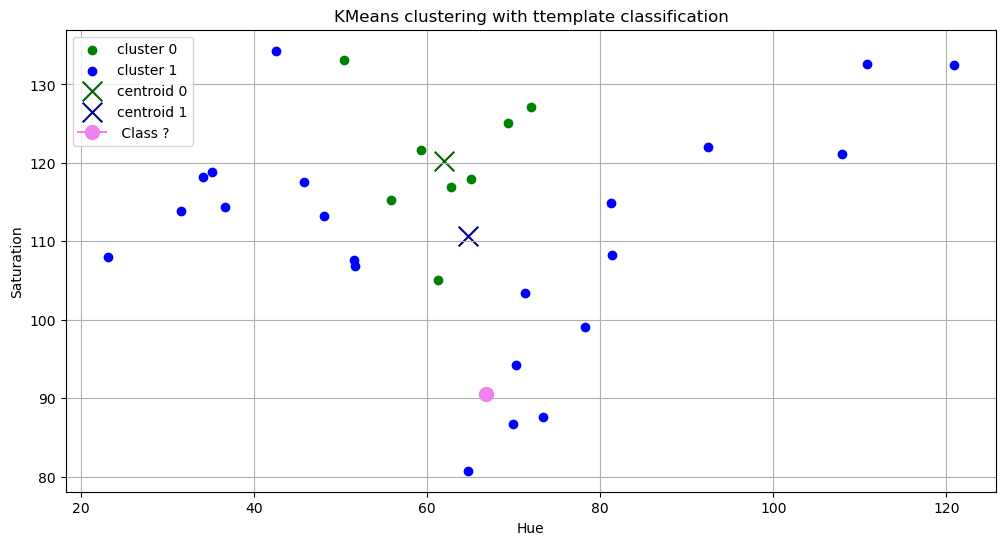

In [39]:
# Create an empty list to store legend labels
legend_labels = []

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:, 0],cluster_0_points[:, 1], c='g', label ='cluster 0')

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:, 0],cluster_1_points[:, 1], c='b', label ='cluster 1')

# Calculate and plot centroids for both the clusters
centroid_0 = np.mean(cluster_0_points, axis=0)
centroid_1 = np.mean(cluster_1_points, axis=0)
plt.scatter(centroid_0[0], centroid_0[1], marker='x', c='darkgreen', s=200, label='centroid 0') ## plot for centroid 0
plt.scatter(centroid_1[0], centroid_1[1], marker='x', c='darkblue', s=200, label='centroid 1')  ## plot for centroid 1
plt.plot(template_hue, template_saturation, marker='o', c= 'violet',markersize= 10, label=' Class ?' )

## Put x label
plt.xlabel('Hue')
## Put y label
plt.ylabel('Saturation')
## Put title
plt.title('KMeans clustering with ttemplate classification')
## Add a legend
plt.legend()
## Add grid
plt.grid()
## Show the plot
plt.show()
                                            ## End of the lab 5 ##

## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 

1. Euclidean distance
2. Mahalanobis distance
3. Manhattan distance
4. Chebyshew distance
5. Minkowski distance
6. Cosine distance
7. Hamming distance

#### 2. What are some real-world applications of distance-based classification algorithms? 
1. Spam detection
2. Medical diagnosis
3. Image classification
4. Anomaly detection
5. Customer segmentation

#### 3. Explain various distance metrics. 
1. Euclidean distance: Represents the shortest distance between two vectors.Works best for continuous numerical data
2. Mahalnobis distance: Represents the distance between a point P and a distribution D.
The idea is to measure how many standard deviations away P is
from the me an o.
3. Manhattan distance: Distance between two points measured along axes at right 
angle.
4. Chebyshew distance: It is defined on a vector space where the distance between two 
vectors is the greatest of their differences along any coordinat 
dimensi.
5. Minkowski distance: A generalized distance metric which can be modified by 
substituting the value of ‘p’ to calculate the distance betwee 
two poin.
6. Cosine distance: Degree of angle between two vectors (called frequencies for 
words in documents). It is used when the magnitude does no 
matter but rather their orientation matter
7. Hamming distance: Measures the minimum number of substitutions required to 
change one string into the othe.r
s.tsonsfD
#### 4. What is the role of cross validation in model per
Role of cross validation: -
1. Helps in evaluating model performance reliably
2. prevent overfitting
3. ensure model generalization well
4. assist in selecting optimal hyoperparametersformance? 

#### 5. Explain variance and bias in term
o Bias: Error due to overly simple assumptions.
In KNN:
Large K implies High Bias
Decision boundary becomes smooth
o Variance: Error due to model sensitivity to training data.
In KNN:
Small K implies High Variance
Model becomes noisy
Very sensitive to outlierss of KNN? 